In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('placement 1.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


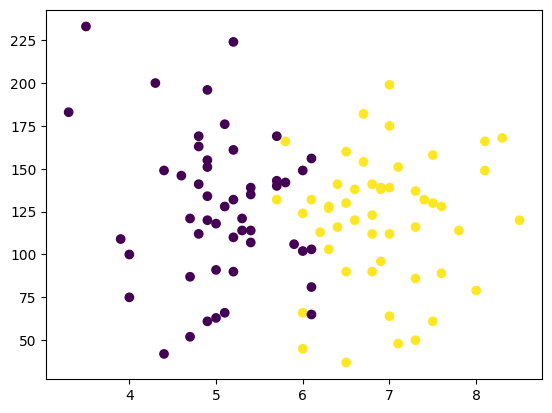

In [7]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [8]:
X = df.iloc[:,0:2]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [9]:
y = df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [11]:
x_train

,cgpa,iq
34,4.8,163.0
69,8.5,120.0
38,6.5,160.0
72,7.3,116.0
10,6.0,45.0
...,...,...
0,6.8,123.0
51,4.8,141.0
2,5.3,121.0
83,7.5,130.0


In [12]:
y_train

34    0
69    1
38    1
72    1
10    1
     ..
0     1
51    0
2     0
83    1
93    1
Name: placement, Length: 90, dtype: int64

In [13]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)

In [16]:
x_train

array([[-1.05439907,  0.94802653],
       [ 2.14045889, -0.10051953],
       [ 0.41350864,  0.87487215],
       [ 1.10428874, -0.1980587 ],
       [-0.01822892, -1.92937895],
       [-0.01822892, -1.41729831],
       [-0.70900902,  2.43549885],
       [-1.14074658, -1.7586854 ],
       [-0.96805155,  0.24086756],
       [ 0.49985615,  0.33840673],
       [-0.79535653,  0.09455881],
       [ 0.75889869,  0.36279152],
       [ 0.93159372,  0.65540903],
       [ 0.75889869, -0.68575454],
       [ 1.27698376,  0.82610257],
       [-1.05439907, -0.29559787],
       [ 0.06811859,  0.77733299],
       [-0.27727146,  1.09433528],
       [ 0.58620367,  1.41133758],
       [-1.14074658, -0.07613474],
       [-0.19092394,  1.02118091],
       [ 0.49985615, -0.10051953],
       [ 0.8452462 ,  0.36279152],
       [-0.96805155,  1.75272467],
       [-1.39978912, -2.00253332],
       [-0.88170404, -0.80767851],
       [-0.27727146,  0.46033069],
       [-0.53631399,  0.36279152],
       [ 1.79506884,

In [17]:
x_test = scaler.transform(x_test)

In [18]:
x_test

array([[ 0.24081362,  0.09455881],
       [ 0.41350864,  0.14332839],
       [ 1.19063625,  0.19209797],
       [-0.96805155,  0.75294819],
       [-0.01822892, -0.53944579],
       [-1.22709409,  0.53348506],
       [-0.96805155, -0.10051953],
       [-0.88170404, -0.14928912],
       [ 0.41350864, -0.8320633 ],
       [-0.79535653, -1.41729831]])

In [29]:
# train the model 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
# Model training
clf.fit(x_train,y_train)

LogisticRegression()

In [22]:
#  Evaluating model
y_pred = clf.predict(x_test)

In [23]:
y_test

63    1
57    1
3     1
76    0
62    0
39    0
22    0
67    0
79    1
9     0
Name: placement, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)

0.9

In [26]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

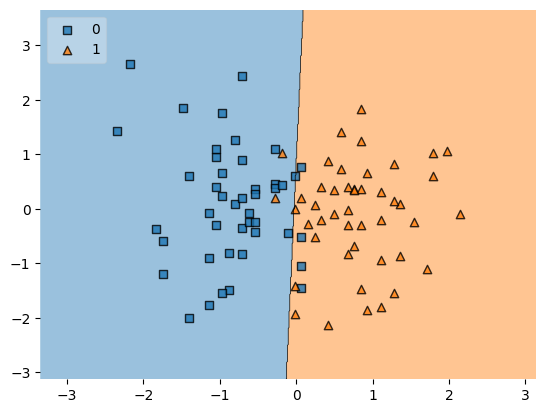

In [27]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [28]:
import pickle

In [29]:
pickle.dump(clf,open('model.pkl','wb'))